# Anytown GNN 
#### Version: 1
#### Branch: main

## Import

In [14]:
import wntr
import pandas as pd
import numpy as np
import pickle
import networkx as nx

import torch
from torch_geometric.data import Data, DataLoader
from torch_geometric.utils import convert

## Load inp(s) into graphs

(<matplotlib.collections.PathCollection at 0x1fe87c82eb0>,
 <matplotlib.collections.LineCollection at 0x1fe87c4db20>)

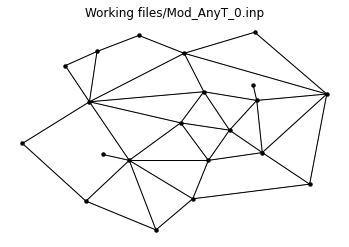

In [6]:
# Create a water network model
inp_file = 'Working files/Mod_AnyT_0.inp'
wn_current_WDS = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn_current_WDS, title=wn_current_WDS.name)


In [7]:
G_WDS = wn_current_WDS.get_graph() # directed multigraph

In [9]:
uG_WDS = G_WDS.to_undirected()

In [12]:
sG_WDS = nx.Graph(G_WDS)
type(sG_WDS)

networkx.classes.graph.Graph

In [29]:
sG_WDS.nodes

NodeView(('20', '30', '40', '50', '55', '60', '70', '75', '80', '90', '100', '110', '115', '120', '130', '140', '150', '160', '170', '65', '165'))

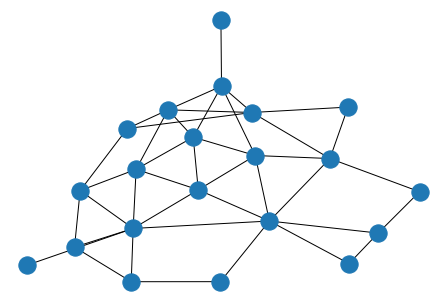

In [21]:
nx.draw(sG_WDS)

In [15]:
pg_sG_WDS = convert.from_networkx(sG_WDS)

In [22]:
pg_sG_WDS

Data(edge_index=[2, 80], pos=[21, 2], type=[80])

In [27]:
np.unique(pg_sG_WDS.type)

array(['Pipe'], dtype='<U4')

In [28]:
pg_sG_WDS.pos

tensor([[6391.6001, 4257.8101],
        [6723.6299, 6181.6401],
        [5327.1499, 7500.0000],
        [3959.9600, 7050.7798],
        [3081.0500, 7431.6401],
        [5366.2100, 6044.9199],
        [5473.6299, 4931.6401],
        [2270.5100, 7089.8398],
        [4340.8198, 6230.4702],
        [4838.8701, 5410.1602],
        [4428.7100, 4765.6299],
        [4125.9800, 3945.3101],
        [1655.2700, 6787.1099],
        [3413.0901, 3281.2500],
        [2055.6599, 3896.4800],
        [2124.0200, 6015.6299],
        [3891.6001, 5566.4102],
        [2895.5100, 4765.6299],
        [ 825.2000, 5126.9502],
        [5297.8501, 6367.1899],
        [2377.9299, 4892.5801]])

In [3]:
database = pickle.load( open( "Mod_AnyT_DB_trial.p", "rb" ) )

data_list = [Data(...), ..., Data(...)]
loader = DataLoader(data_list, batch_size=32)

